<a href="https://colab.research.google.com/github/anko191/Python_Kaggle/blob/master/DLFZ/DLFZ_ch04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [157]:
# 二乗和誤差
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
t = [0,0,1,0,0,0,0,0,0,0]

def sum_squared_error(y,t):
    return 0.5 * np.sum((y-t)**2)
sum_squared_error(np.array(y), np.array(t))

0.09750000000000003

In [158]:
# なぜか「7」の確率が最も高い場合
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
sum_squared_error(np.array(y), np.array(t))

0.5975

In [159]:
# 交差エントロピ―誤差
def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t * np.log(y + delta))

In [160]:
# np.arange(0.0, 6, 0.01)
cross_entropy_error(np.array(y), np.array(t))

2.302584092994546

In [161]:
# ミニバッチ学習 100枚を無差別に取り出すぜ..!!!
import sys, os
sys.path.append(os.pardir)
import numpy as np
from mnist import load_mnist
(x_train,t_train),(x_test,t_test) = load_mnist(normalize=True, one_hot_label=True)
t_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [162]:
print(x_train.shape)
print(t_train.shape)

(60000, 784)
(60000, 10)


In [163]:
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

In [164]:
# バッチに対応されてるversion
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    batch_size = y.shape[0]
    return -np.sum(t * np.log(y + 1e-7)) / batch_size
    # return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

In [165]:
# numerical differentiation
def numerical_diff(f, x):
    h = 1e-4
    return (f(x+h) - f(x-h)) / (2*h)

In [166]:
def function_1(x):
    return 0.01*x**2 + 0.1*x


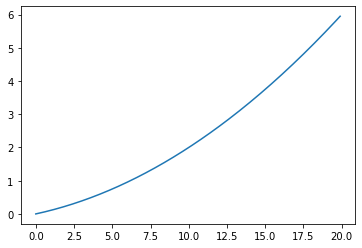

In [167]:
import numpy as np
import matplotlib.pyplot as plt
x = np.arange(0.0,20.0,0.1)
y = function_1(x)
plt.plot(x,y)

In [168]:
numerical_diff(function_1, 5)

0.1999999999990898

In [169]:
# 偏微分
def function_2(x):
    return x[0] ** 2 + x[1] ** 2
    # or return np.sum(x**2)

In [170]:
def function_tmp1(x0):
    return x0 * x0 + 4.0 ** 2.0
numerical_diff(function_tmp1, 3.0)

6.00000000000378

In [171]:
def numerical_gradient(f, x):
    h = 1e-4
    grad = np.zeros_like(x)
    for idx in range(x.size):
        tmp_val = x[idx]
        # f(x+h)
        x[idx] = tmp_val + h
        fxh1 = f(x)
        # f(x-h)
        x[idx] = tmp_val - h
        fxh2 = f(x)
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val # もとに戻す
    return grad

In [172]:
def gradient_descent(f, init_x, lr = 0.01, step_num = 100):
    x = init_x
    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x -= lr * grad
    return x

In [173]:
def function_2(x):
    return x[0] ** 2 + x[1] ** 2

In [174]:
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x = init_x, lr = 0.1, step_num = 100)

array([-6.11110793e-10,  8.14814391e-10])

In [175]:
# 真の値の最小値は (0,0) なので、勾配法によって、ほぼ正しい x^2 + y^2の最小値は(0,0)でしょ??

In [176]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
# softmax
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a-c) # here.
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y
# cross entropy error
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    # one hot 表現の時、正解ラベルのインデックスに変換
    if t.size == y.size:
        t = t.argmax(axis = 1)
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size
# def numerical_gradient(f, x):
#     h = 1e-4
#     grad = np.zeros_like(x)
#     for idx in range(x.size):
#         tmp_val = x[idx]
#         # f(x+h)
#         x[idx] = tmp_val + h
#         fxh1 = f(x)
#         # f(x-h)
#         x[idx] = tmp_val - h
#         fxh2 = f(x)
        
#         grad[idx] = (fxh1 - fxh2) / (2*h)
#         x[idx] = tmp_val # もとに戻す
#     return grad


# ! renewed ! 多次元対応
def numerical_gradient(f, x):
    h = 1e-4
    grad = np.zeros_like(x)
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    while not it.finished:
        idx = it.multi_index
        tmp_val = x[idx]
        x[idx] = tmp_val + h
        fxh1 = f(x)
        
        x[idx] = tmp_val - h
        fxh2 = f(x)
        grad[idx] = (fxh1-fxh2) / (2*h)

        x[idx] = tmp_val
        it.iternext()
    return grad

In [177]:
class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2,3) # ガウス分布で初期化
    def predict(self, x):
        return np.dot(x, self.W)
    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)
        return loss

In [178]:
net = simpleNet()

In [179]:
print(net.W)

[[-1.1779306  -0.77383853 -1.24178528]
 [-0.49509918 -0.02989912  0.54978036]]


In [180]:
x = np.array([0.6, 0.9])
p = net.predict(x)

In [181]:
print(p)

[-1.15234762 -0.49121233 -0.25026885]


In [182]:
np.argmax(p)

2

In [183]:
t = np.array([0,0,1])
net.loss(x,t)

0.7846368612021137

In [184]:
# 勾配
f = lambda w:net.loss(x,t)

In [185]:
x = np.array([0.6,0.9])
t = np.array([0,0,1])
net = simpleNet()
dW = numerical_gradient(f, net.W)
print(dW)

[[ 0.20293677  0.29813207 -0.50106885]
 [ 0.30440516  0.44719811 -0.75160327]]


In [186]:
class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size, weight_init_std = 0.01):
        # 重みの初期化
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)
    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        return y
    # x:inputdata, t:testdata
    def loss(self, x, t):
        y = self.predict(x)
        return cross_entropy_error(y, t)
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(axis = 1)
        t = np.argmax(axis = 1)

        accuracy = np.sum(y == t) / floa(x.shape[0])
        return accuracy
    # x, t
    def numerical_gradient(self, x, t):
        loss_W = lambda W:self.loss(x, t)
        grads = {}
        print('!hey')
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        return grads

In [187]:
net = TwoLayerNet(input_size = 784, hidden_size = 100, output_size=10)
net.params['W1'].shape
net.params['b1'].shape
net.params['W2'].shape
net.params['b2'].shape
x = np.random.rand(100, 784)
y = net.predict(x)
#print(y)

In [188]:
x = np.random.rand(100, 784)
t = np.random.rand(100,10) # ダミー正解モデル
grads = net.numerical_gradient(x, t)
print(grads['W1'].shape)
print(grads['b1'].shape)
print(grads['W2'].shape)
print(grads['b2'].shape)

!hey


KeyboardInterrupt: ignored

In [189]:
def sigmoid_grad(x):
    return (1.0 - sigmoid(x)) * sigmoid(x)

In [190]:
def gradient(self, x, t):
    W1, W2 = self.params['W1'], self.params['W2']
    b1, b2 = self.params['b1'], self.params['b2']
    grads = {}
    batch_num = x.shape[0]
    # forward
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    y = softmax(a2)

    # backword
    dy = (y - t) / batch_num
    grads['W2'] = np.dot(z1.T, dy)
    grads['b2'] = np.sum(dy, axis = 0)
    dz1 = np.dot(dy, W2.T)
    da1 = sigmoid_grad(a1) * dz1
    
    grads['W1'] = np.dot(x.T, da1)
    grads['b1'] = np.sum(da1, axis = 0)
    return grads